### Project Objectives

Given 27 different companies in the SP500, we will extract their stock price data directly from Yahoo Finance. The objective is to use the KMeans algorithm to categorize these companies into 5 clusters, by the magnitude of the changes in opening and closing stock price between Jan 1st 2015 and Jan 1st 2020.

### Import Libraries

In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

### Data Extraction

In [2]:
companies_dict = {
    "Amazon": "AMZN",
    "Apple": "AAPL",
    "Walgreen": "WBA",
    "Northrop Grumman": "NOC",
    "Boeing": "BA",
    "Lockheed Martin": "LMT",
    "McDonalds": "MCD",
    "Intel": "INTC",
    "Navistar": "NAV",
    "IBM": "IBM",
    "Texas Instruments": "TXN",
    "MasterCard": "MA",
    "Microsoft": "MSFT",
    "General Electrics": "GE",
    "American Express": "AXP",
    "Pepsi": "PEP",
    "Coca Cola": "KO",
    "Johnson & Johnson": "JNJ",
    "Toyota": "TM",
    "Honda": "HMC",
    "Mitsubishi": "MSBHF",
    "Sony": "SNE",
    "Exxon": "XOM",
    "Chevron": "CVX",
    "Valero Energy": "VLO",
    "Ford": "F",
    "Bank of America": "BAC"}

In [3]:
data_source = "yahoo"
start_date = "2015-01-01"
end_date = "2020-01-01"
data = data.DataReader(list(companies_dict.values()), data_source,start_date,end_date)

### Explanatory Data Analysis

In [4]:
data.head()

Attributes   Adj Close                                                \
Symbols           AMZN       AAPL        WBA         NOC          BA   
Date                                                                   
2015-01-02  308.519989  24.898552  65.250008  132.902039  112.786011   
2015-01-05  302.190002  24.197117  63.962185  130.098083  112.004875   
2015-01-06  295.290009  24.199400  64.125320  130.814941  110.685638   
2015-01-07  298.420013  24.538729  65.765137  134.952805  112.404106   
2015-01-08  300.459991  25.481558  66.580788  138.083435  114.391670   

Attributes                                                           ...  \
Symbols            LMT        MCD       INTC        NAV         IBM  ...   
Date                                                                 ...   
2015-01-02  164.792603  79.218002  30.858051  34.160000  124.083694  ...   
2015-01-05  161.365631  78.343079  30.510092  33.099998  122.131233  ...   
2015-01-06  160.606934  78.487503  29.941477  32.299999  119.497353  ...   
2015-01-07  162.678482  79.855064  30.569496  32.919998  118.716354  ...   
2015-01-08  166.344131  80.152367  31.138117  31.809999  121.296631  ...   

Attributes     Volume                                                    \
Symbols           JNJ        TM        HMC MSBHF        SNE         XOM   
Date                                                                      
2015-01-02  5753600.0  250000.0  1150900.0   0.0  1229900.0  10220400.0   
2015-01-05  8079300.0  240600.0  1483600.0   0.0  1083100.0  18502400.0   
2015-01-06  7428000.0  285600.0   773800.0   0.0  2209100.0  16670700.0   
2015-01-07  7931700.0  385700.0   814600.0   0.0  2486300.0  13590700.0   
2015-01-08  9916000.0  498800.0   726400.0   0.0  1296500.0  15487500.0   

Attributes                                                  
Symbols            CVX        VLO           F          BAC  
Date                                                        
2015-01-02   5898800.0  5897000.0  24777900.0   48951100.0  
2015-01-05  11758100.0  7732700.0  44079700.0  105605500.0  
2015-01-06  11591600.0  8586800.0  32981600.0  144912400.0  
2015-01-07  10353800.0  8825800.0  26065300.0  104603800.0  
2015-01-08   8650800.0  8941700.0  33943400.0   73388500.0  

[5 rows x 162 columns]

In [5]:
data.isna().sum()

Attributes  Symbols
Adj Close   AMZN       0
            AAPL       0
            WBA        0
            NOC        0
            BA         0
                      ..
Volume      XOM        0
            CVX        0
            VLO        0
            F          0
            BAC        0
Length: 162, dtype: int64

In [6]:
stock_open = np.array(data["Open"]).T
stock_close = np.array(data["Close"]).T

In [7]:
close_open_diff = stock_close - stock_open
sum_of_diff = np.sum(close_open_diff, 1)

In [8]:
for i in range(len(companies_dict)):
    print("Company:{}, Change:{}".format(data["High"].columns[i], sum_of_diff[i]))

Company:AMZN, Change:-560.0699462890625
Company:AAPL, Change:24.905010223388672
Company:WBA, Change:-22.450008392333984
Company:NOC, Change:26.85986328125
Company:BA, Change:137.41961669921875
Company:LMT, Change:-3.889801025390625
Company:MCD, Change:17.860008239746094
Company:INTC, Change:30.150007247924805
Company:NAV, Change:-25.06998109817505
Company:IBM, Change:-11.569831848144531
Company:TXN, Change:42.06986618041992
Company:MA, Change:61.94988250732422
Company:MSFT, Change:17.409942626953125
Company:GE, Change:-3.0280356407165527
Company:AXP, Change:2.370147705078125
Company:PEP, Change:25.760086059570312
Company:KO, Change:12.87997055053711
Company:JNJ, Change:14.56988525390625
Company:TM, Change:-35.38002014160156
Company:HMC, Change:-16.25001335144043
Company:MSBHF, Change:-3.070010185241699
Company:SNE, Change:-4.390047073364258
Company:XOM, Change:-5.6600799560546875
Company:CVX, Change:-14.0699462890625
Company:VLO, Change:-0.2899513244628906
Company:F, Change:-10.7300124

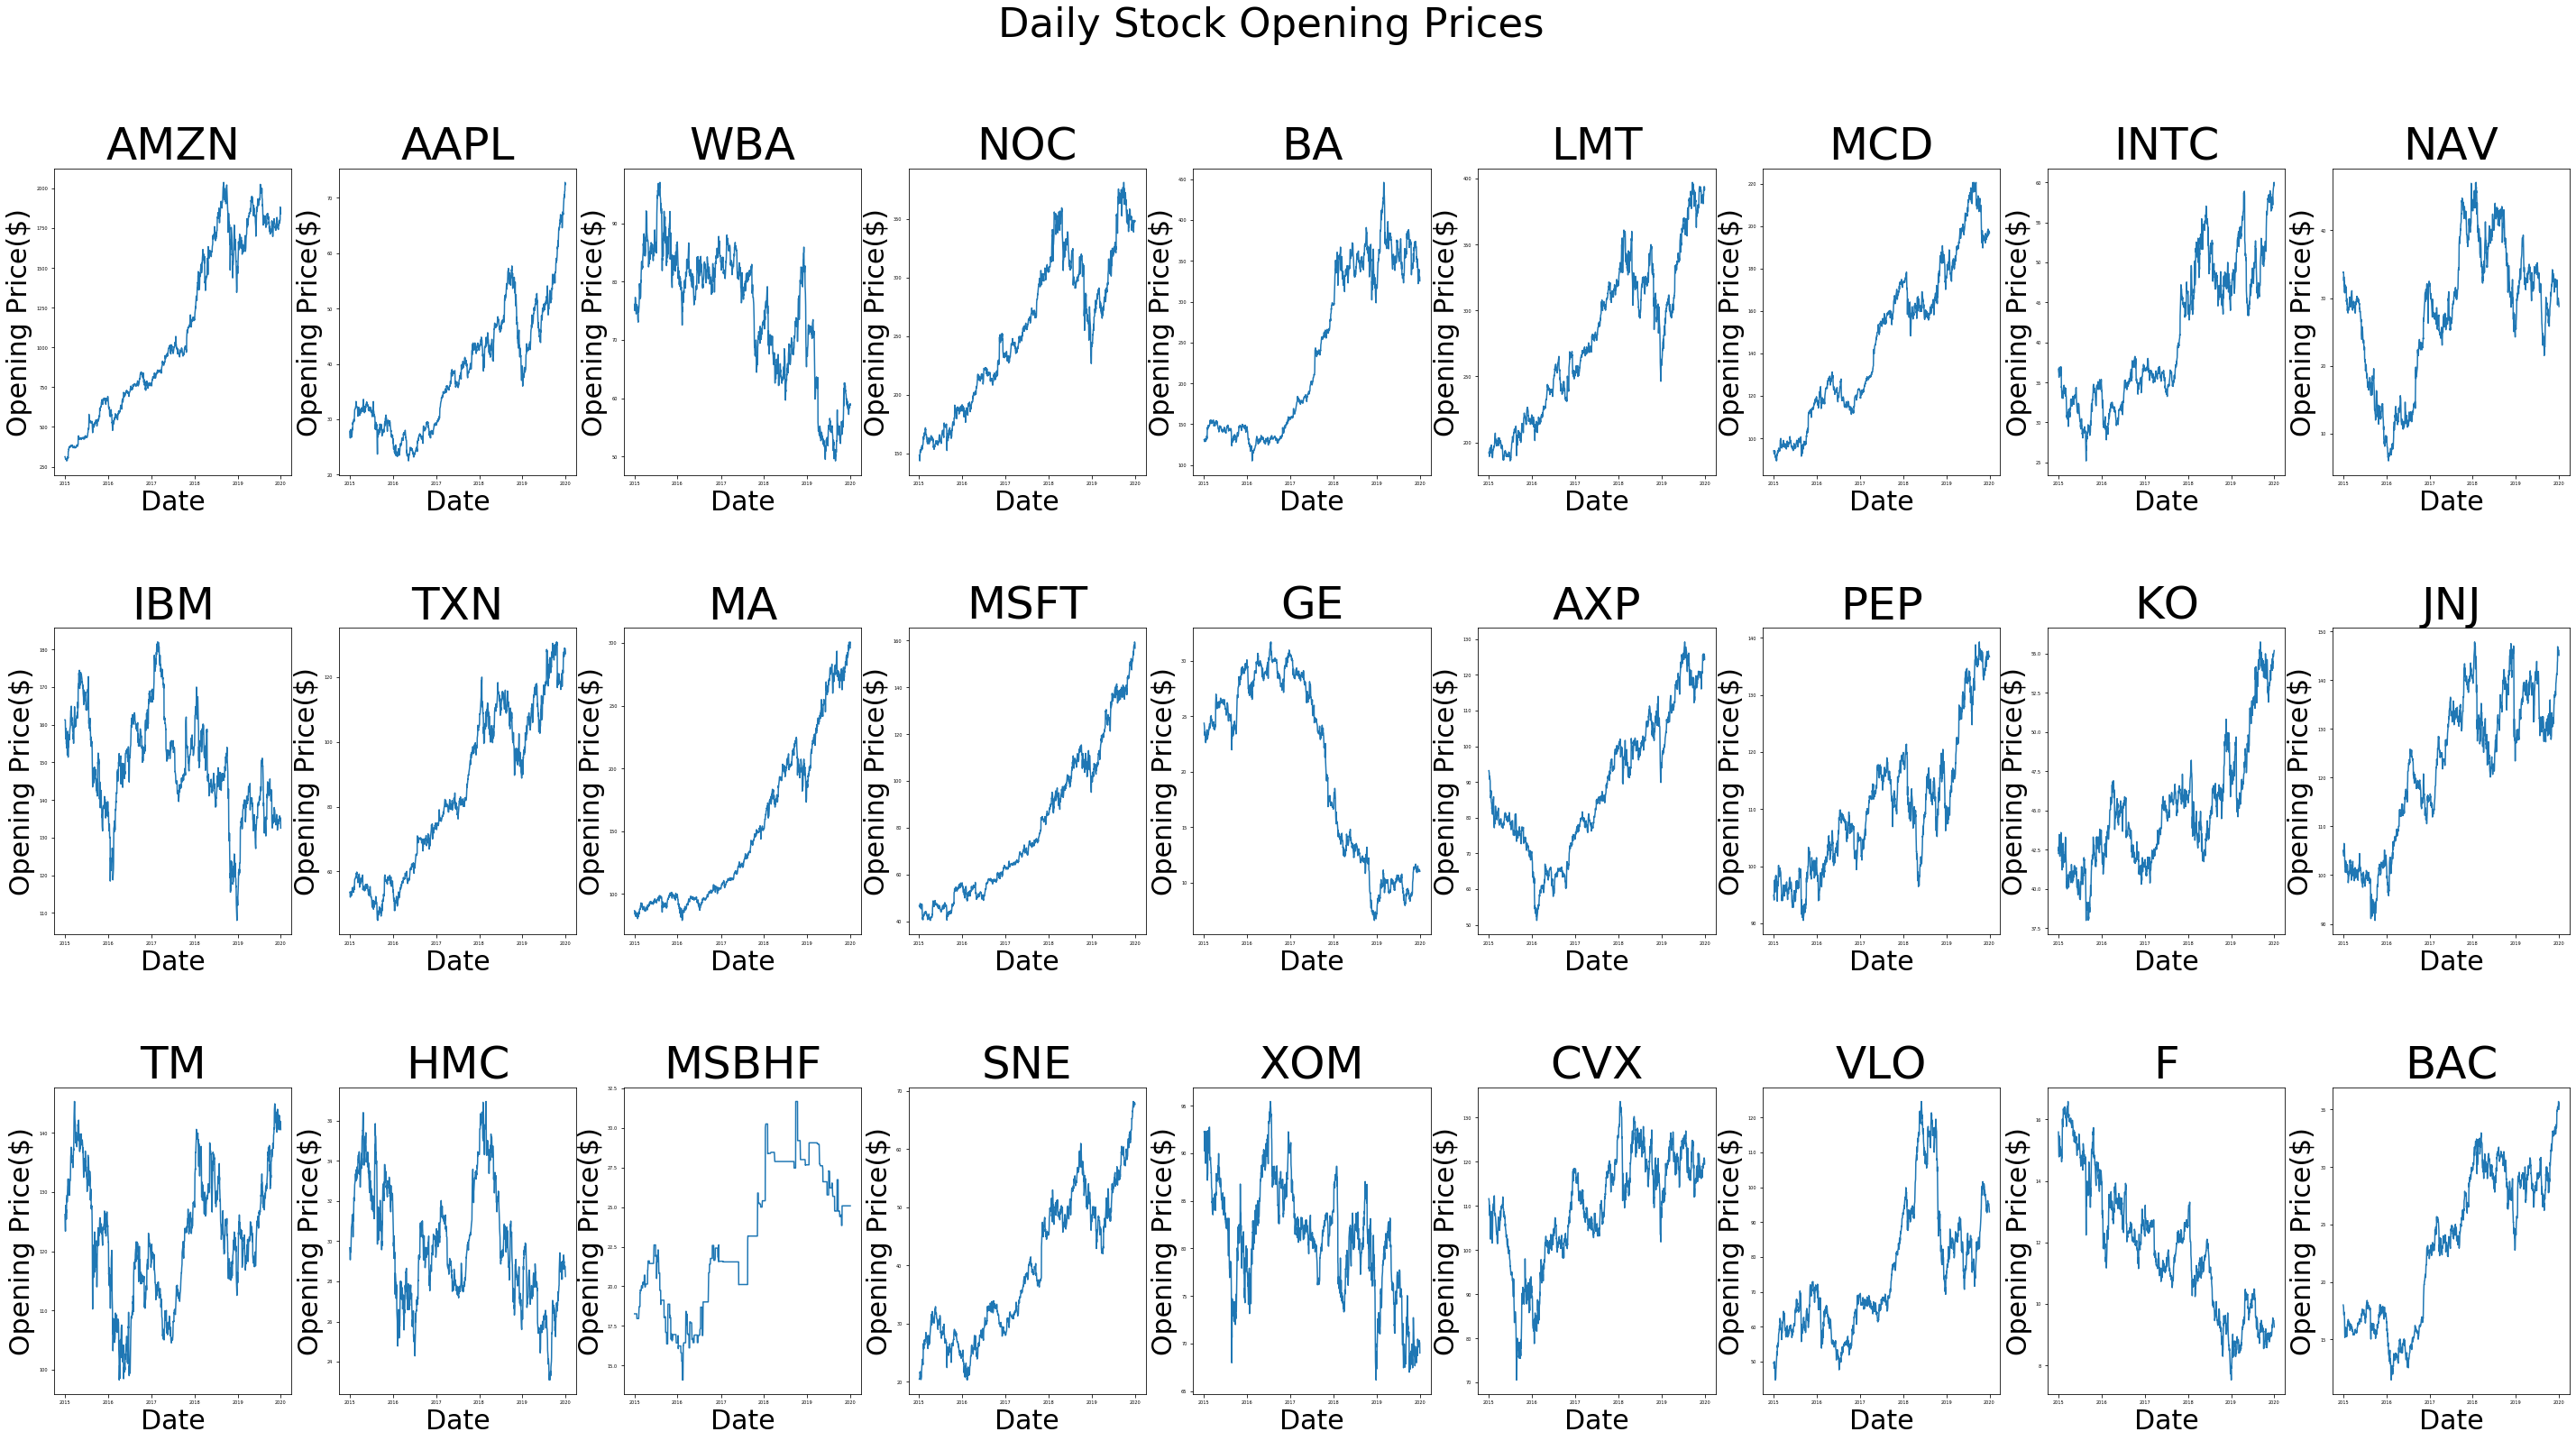

In [9]:
fig, axes = plt.subplots(nrows = 3, ncols = 9, figsize = (50, 25))
fig.subplots_adjust(hspace = 0.5)
fig.suptitle("Daily Stock Opening Prices", fontsize = 45)

for ax, value in zip(axes.flatten(), companies_dict.values()):
    lp = sns.lineplot(data = data["Open"][value], ax = ax)
    lp.axes.set_title(value, fontsize = 50)
    lp.set_xlabel("Date", fontsize = 30)
    lp.set_ylabel("Opening Price($)", fontsize = 30)
    lp.tick_params(labelsize = 5)

plt.show()

These plots are just here to provide an idea of the general trend of each stock. It must be noted that the y-axes are DIFFERENT for each stock and should not be compared. Rather, we want to have a sense of the general stock price movement.

### Feature Engineering

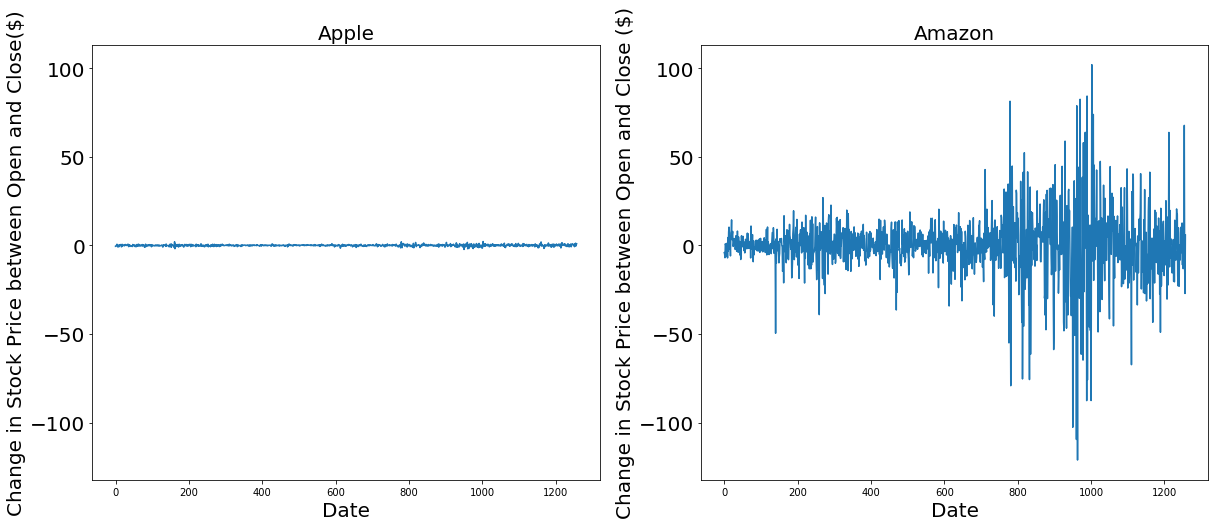

In [10]:
plt.figure(figsize = (20, 8))

ax1 = plt.subplot(1, 2, 1)

plt.title("Apple", fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel("Date", fontsize = 20)
plt.ylabel("Change in Stock Price between Open and Close($)", fontsize = 20)
plt.plot(close_open_diff[1])

plt.subplot(1, 2, 2, sharey = ax1)
plt.title("Amazon", fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel("Date", fontsize = 20)
plt.ylabel("Change in Stock Price between Open and Close ($)", fontsize = 20)
plt.plot(close_open_diff[0])

By inspection of the plots above, the stock prices for Amazon and Apple are on different scales. This can be generalized for all 27 stocks. Therefore, normalization or standardization is called for, if we want to model stock price using machine learning techniques.

In [11]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
norm_movements = normalizer.fit_transform(close_open_diff)

In [12]:
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.6659312499993595
0.25377127165861635
-6.717196499305924e-05


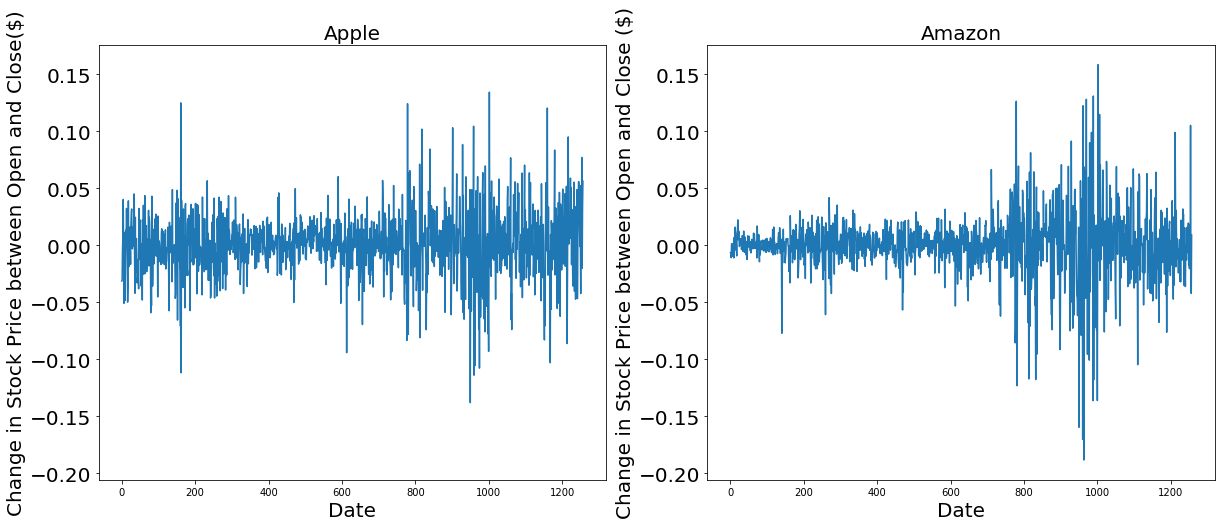

In [13]:
plt.figure(figsize = (20, 8))

ax1 = plt.subplot(1, 2, 1)

plt.title("Apple", fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel("Date", fontsize = 20)
plt.ylabel("Change in Stock Price between Open and Close($)", fontsize = 20)
plt.plot(norm_movements[1])

plt.subplot(1, 2, 2, sharey = ax1)
plt.title("Amazon", fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel("Date", fontsize = 20)
plt.ylabel("Change in Stock Price between Open and Close ($)", fontsize = 20)
plt.plot(norm_movements[0])

Our stock price changes are now on the same scale and meaningful comparisons can be made.

### Data Pipeline

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

normalizer = Normalizer()
kmeans = KMeans(n_clusters = 5, max_iter = 1000, random_state = 1)

pipeline = make_pipeline(normalizer, kmeans)

pipeline.fit(close_open_diff)
predictions = pipeline.predict(close_open_diff)

In [15]:
predictions

array([1, 1, 0, 2, 2, 2, 0, 1, 3, 3, 1, 1, 1, 3, 3, 0, 0, 0, 3, 3, 4, 1,
       4, 4, 4, 3, 3], dtype=int32)

In [16]:
predict_df = pd.DataFrame({"Cluster":predictions, "companies":list(companies_dict)})
predict_df

,Cluster,companies
0,1,Amazon
1,1,Apple
2,0,Walgreen
3,2,Northrop Grumman
4,2,Boeing
5,2,Lockheed Martin
6,0,McDonalds
7,1,Intel
8,3,Navistar
9,3,IBM


### Dimensionality Reduction (PCA)

In [17]:
norm_movements.shape

(27, 1258)

In [18]:
from sklearn.decomposition import PCA

normalizer = Normalizer()

pca_data = PCA(n_components = 2)

kmeans = KMeans(n_clusters = 5, max_iter = 1000)

pipeline = make_pipeline(normalizer, pca_data, kmeans)

pipeline.fit(close_open_diff)

preditions = pipeline.predict(close_open_diff)

predict2_df = pd.DataFrame({"Cluster":predictions, "companies":list(companies_dict)})
predict2_df


,Cluster,companies
0,1,Amazon
1,1,Apple
2,0,Walgreen
3,2,Northrop Grumman
4,2,Boeing
5,2,Lockheed Martin
6,0,McDonalds
7,1,Intel
8,3,Navistar
9,3,IBM


### Visualizing Results

<Figure size 432x288 with 0 Axes>

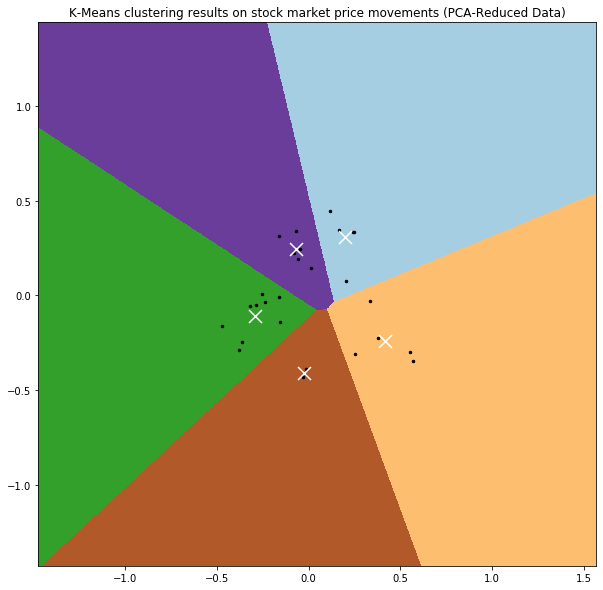

In [19]:
# Reduce Data Dimensionality
pca_data = PCA(n_components = 2).fit_transform(norm_movements)

# Define the mesh step size
h = 0.002

# Plot decision boundary
x_min, x_max = pca_data[:,0].min()-1, pca_data[:, 0].max() + 1
y_min, y_max = pca_data[:,1].min()-1, pca_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Label each point in the mesh using our model
kpredictions = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot results by color
kpredictions = kpredictions.reshape(xx.shape)
cmap = plt.cm.Paired
plt.clf()
plt.figure(figsize = (10, 10))
plt.imshow(kpredictions, interpolation = "nearest", extent = (xx.min(), xx.max(), yy.min(), yy.max()), 
           cmap = cmap, aspect = "auto", origin = "lower")
plt.plot(pca_data[:, 0], pca_data[:, 1], "k.", markersize = 5)

# Plot the centroid of each cluster (white X)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = "x", s = 169, 
            linewidths = 3, color = "w", zorder = 10)
plt.title("K-Means clustering results on stock market price movements (PCA-Reduced Data)")
plt.show()
    

In [20]:
results = pd.DataFrame({"Clusters":predictions, "Companies":list(companies_dict)}).sort_values(by=["Clusters"], axis = 0)
results

,Clusters,Companies
16,0,Coca Cola
17,0,Johnson & Johnson
2,0,Walgreen
6,0,McDonalds
15,0,Pepsi
12,1,Microsoft
11,1,MasterCard
10,1,Texas Instruments
0,1,Amazon
1,1,Apple
